In [3]:
import numpy as np
import scipy.stats as stats

In [32]:
history = []

def binary_test(roster):
    global history
    
    n = len(roster)
    s = sum([x[1] for x in roster]) 
    
    results = []
    
    result_string = "Positive" if s > 0 else "Negative"
    
    history.append(([x[0] for x in roster], result_string))
    
    
    if len(roster) <= 1:
        results.extend(roster)
#         return results
    elif s == 0:
        results.extend(roster)
#         return results
    else:
        cut = n // 2
        a = roster[:cut]
        b = roster[cut:]
        r1 = binary_test(a)
        r2 = binary_test(b)
        results.extend(r1)
        results.extend(r2)
        
    return results

In [ ]:
pcr_capacity_options = [32, 96, 384, 1536]
PROBS = {
    'pos': 54231*800/7.8e9 ,
    'asymp_|_pos': 0.3,
}

class XaryTest:
    
    def __init__(self, patient_list, split=0.5, n_machines=1, machine_capacity=32):
        self.patient_list = patient_list
        self.n_machines = n_machines
        self.machine_capacity = machine_capacity
        
        self.history = []
    
    def _split_by_fraction(self):
        pass
    
    def _split_by_count(self):
        pass
    
    def _pui_test(self):
        pass
    
    def _naive_test(self):
        n = self.patient_list
        s = sum([x[1] for x in roster]) 

        results = []

        result_string = "Positive" if s > 0 else "Negative"

        history.append(([x[0] for x in roster], result_string))


        if len(roster) <= 1:
            results.extend(roster)
    #         return results
        elif s == 0:
            results.extend(roster)
    #         return results
        else:
            cut = n // 2
            a = roster[:cut]
            b = roster[cut:]
            r1 = binary_test(a)
            r2 = binary_test(b)
            results.extend(r1)
            results.extend(r2)

        return results
    
    def xary_test(self):
        pass
    
class PatientList(self):
    
    def __init__(self, probs=PROBS, n_patients=1024):
        self.n_patients
        
    def _compute_probs(self):
        pass 

In [6]:
roster

array([False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False])

In [33]:
history = []
roster = [(j, np.random.choice([1, 0], p=[0.2, 0.8])) for j in range(4)]
results = binary_test(roster)

In [28]:
from collections import defaultdict

In [8]:

def timeline(history):
    when_detect = defaultdict(list)

    for ix, (sample, result) in enumerate(history):

        if len(sample) > 1 and result == "Negative":
            when_detect[ix].extend(sample)
        elif len(sample) == 1:
            when_detect[ix].extend(sample)
    
    return when_detect

In [34]:
for ix, (pool, result) in enumerate(history):
    print(f"Test {ix + 1} included patients: \n{pool}\n and tested:\n {result}\n")

Test 1 included patients: 
[0, 1, 2, 3]
 and tested:
 Negative



In [24]:
def solve_k(p):
    #(1-p) ^k = 1/2
    q = 1 - p
    k = np.log(0.5) / np.log(q)
    return k

In [26]:
solve_k(0.05)

13.513407333964874

In [10]:
from tqdm import trange

In [21]:
N = 10000
his_lens = []
num_negative = {}

p = 0.05
for j in trange(N):
    
    roster = [(j+1, np.random.choice([True, False], p=[p, 1-p])) for j in range(32)]
    history = []
    _ = binary_test(roster)
    his_lens.append(len(history))
    when_detect = timeline(history)
    num_negative.update({k + 32 * j: len(v) for k, v in when_detect.items()})
    

100%|██████████| 10000/10000 [00:20<00:00, 498.39it/s]


p asymptomatic = 1 * 1 - ppos + p asymptomatic | pos p pos
p positive = 1e6 / 7e9
p asymptomatic | positive = 0.3
p positive | asymptomatic

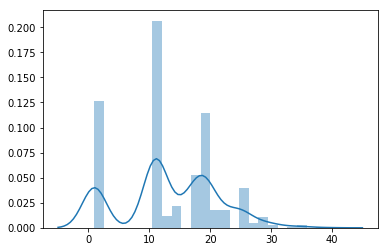

In [20]:
import seaborn as sns
%matplotlib inline

sns.distplot(his_lens)

In [383]:
p_P = 1e6 / 7e9

In [384]:
p_A_P = 0.3

In [385]:
p_A = 1. * (1 - p_P) + p_A_P * p_P

In [386]:
p_P_A = p_A_P * p_P / p_A

In [387]:
p_A

0.9999

In [391]:
p_P_A

4.286142900004286e-05

In [389]:
p_P

0.00014285714285714287

In [400]:
p_P_nA = (1 - p_A_P) * p_P / (1 - p_A)

In [401]:
p_P_nA

1.0000000000001101

In [ ]:
sns.kdeplot(his_lens)

In [380]:
np.mean([*num_negative.values()])

2.996620352985355

In [374]:
np.mean(num_negative.values())

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

In [347]:
np.mean(his_lens)

3.846

In [361]:
pd.Series(num_negative).cumsum().reset_index()

,index,0
0,1,16
1,5,18
2,7,19
3,8,20
4,9,24
5,10,32
6,34,40
7,37,42
8,39,43
9,40,44


In [332]:
{k: len(v) for k, v in when_detect.items()}

{2: 8,
 4: 4,
 7: 1,
 8: 1,
 9: 2,
 12: 4,
 15: 1,
 16: 1,
 18: 1,
 19: 1,
 22: 2,
 24: 1,
 25: 1,
 27: 2,
 29: 1,
 30: 1}

In [283]:
[(x, y) for x, y in history if not y]

[([(0, 0), (1, 0)], False),
 ([(3, 0)], False),
 ([(4, 0), (5, 0)], False),
 ([(8, 0), (9, 0), (10, 0), (11, 0)], False),
 ([(12, 0), (13, 0)], False),
 ([(15, 0)], False),
 ([(16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0)],
  False),
 ([(24, 0), (25, 0), (26, 0), (27, 0)], False),
 ([(29, 0)], False),
 ([(30, 0), (31, 0)], False),
 ([(0, 0), (1, 0)], False),
 ([(3, 0)], False),
 ([(4, 0), (5, 0)], False),
 ([(8, 0), (9, 0), (10, 0), (11, 0)], False),
 ([(12, 0), (13, 0)], False),
 ([(15, 0)], False),
 ([(16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0)],
  False),
 ([(24, 0), (25, 0), (26, 0), (27, 0)], False),
 ([(29, 0)], False),
 ([(30, 0), (31, 0)], False)]

In [281]:
[(x[0][0], y) for x, y in history if len(x) == 1]

[(2, True),
 (3, False),
 (6, True),
 (7, True),
 (14, True),
 (15, False),
 (28, True),
 (29, False),
 (2, True),
 (3, False),
 (6, True),
 (7, True),
 (14, True),
 (15, False),
 (28, True),
 (29, False)]

In [200]:
roster = {j: np.random.choice([1, 0], p=[0.2, 0.8]) for j in range(32)}

In [203]:
binary_test(roster)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-203-ad54c780eab0>", line 1, in <module>
    binary_test(roster)
  File "<ipython-input-198-78ead1710460>", line 14, in binary_test
    r2 = binary_test(b)
  File "<ipython-input-198-78ead1710460>", line 14, in binary_test
    r2 = binary_test(b)
  File "<ipython-input-198-78ead1710460>", line 14, in binary_test
    r2 = binary_test(b)
  [Previous line repeated 2955 more times]
  File "<ipython-input-198-78ead1710460>", line 11, in binary_test
    a = {k: v for k, v in roster.items() if k in range(cut)}
  File "<ipython-input-198-78ead1710460>", line 11, in <dictcomp>
    a = {k: v for k, v in roster.items() if k in range(cut)}
RecursionError: maximum recursion depth exceeded in comparison

During handling of the above exception, another exception occurred:

Traceback (most

RecursionError: maximum recursion depth exceeded in comparison

In [187]:
roster = {1:1, 2:0}

In [192]:
n = len(roster)
results = {}

cut = n // 2
a = {k:v for k, v in roster.items() if k in range(cut + 1)}
b = {k:v for k, v in roster.items() if k not in range(cut + 1)}


In [193]:
a

{1: 1}

In [194]:
b

{2: 0}

In [180]:
r1 = binary_test(a)

In [181]:
r1

{}

In [182]:
r2 = binary_test(b)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-182-10adbf6cffaa>", line 1, in <module>
    r2 = binary_test(b)
  File "<ipython-input-175-661b3eaafd02>", line 15, in binary_test
    r2 = binary_test(b)
  File "<ipython-input-175-661b3eaafd02>", line 15, in binary_test
    r2 = binary_test(b)
  File "<ipython-input-175-661b3eaafd02>", line 15, in binary_test
    r2 = binary_test(b)
  [Previous line repeated 2955 more times]
  File "<ipython-input-175-661b3eaafd02>", line 12, in binary_test
    a = {k:v for k, v in roster.items() if k in range(cut)}
  File "<ipython-input-175-661b3eaafd02>", line 12, in <dictcomp>
    a = {k:v for k, v in roster.items() if k in range(cut)}
RecursionError: maximum recursion depth exceeded in comparison

During handling of the above exception, another exception occurred:

Traceback (most r

RecursionError: maximum recursion depth exceeded in comparison

In [153]:
r2 = binary_test(b)
results.update(r1)
results.update(r2)

{0: 0, 1: 0}

In [158]:
binary_test({0:0, 1:1, 2:0})

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-158-4f48167d4551>", line 1, in <module>
    binary_test({0:0, 1:1, 2:0})
  File "<ipython-input-154-55439070d1c6>", line 15, in binary_test
    r2 = binary_test(b)
  File "<ipython-input-154-55439070d1c6>", line 15, in binary_test
    r2 = binary_test(b)
  File "<ipython-input-154-55439070d1c6>", line 15, in binary_test
    r2 = binary_test(b)
  [Previous line repeated 2955 more times]
  File "<ipython-input-154-55439070d1c6>", line 12, in binary_test
    a = {k:v for k, v in roster.items() if k in range(cut)}
  File "<ipython-input-154-55439070d1c6>", line 12, in <dictcomp>
    a = {k:v for k, v in roster.items() if k in range(cut)}
RecursionError: maximum recursion depth exceeded in comparison

During handling of the above exception, another exception occurred:

Tracebac

RecursionError: maximum recursion depth exceeded in comparison

In [140]:
test_manager = TestManager(patient_list, testing_machine)

In [141]:
test_manager.binary_search()

({1: <__main__.Patient at 0x11dcd9978>,
  2: <__main__.Patient at 0x11dcd9c18>,
  3: <__main__.Patient at 0x11dcd96a0>,
  4: <__main__.Patient at 0x11dcd9080>,
  5: <__main__.Patient at 0x11dcd9f98>,
  6: <__main__.Patient at 0x11dcd9eb8>,
  7: <__main__.Patient at 0x11dcd90b8>,
  8: <__main__.Patient at 0x11dcd9898>,
  9: <__main__.Patient at 0x11dcd9908>,
  10: <__main__.Patient at 0x11dcd9390>,
  11: <__main__.Patient at 0x11dcd9748>,
  12: <__main__.Patient at 0x11dcd9518>,
  13: <__main__.Patient at 0x11dcd9160>,
  14: <__main__.Patient at 0x11dcd9dd8>,
  15: <__main__.Patient at 0x11dcd9550>,
  16: <__main__.Patient at 0x11dcd9828>},
 {17: <__main__.Patient at 0x11de7ab38>,
  18: <__main__.Patient at 0x11de7aa20>,
  19: <__main__.Patient at 0x11de7aba8>,
  20: <__main__.Patient at 0x11de7a908>,
  21: <__main__.Patient at 0x11de7af60>,
  22: <__main__.Patient at 0x11de7a860>,
  23: <__main__.Patient at 0x11de7a9b0>,
  24: <__main__.Patient at 0x11de7a828>,
  25: <__main__.Patient 

In [126]:
test_manager.testing_machine.history

{1: ([1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32],
  True)}

In [125]:
test_manager._one_test(test_manager.patient_list)

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 True)

In [31]:
patients = [Patient() for _ in range(16)]

In [34]:
n = len(patients)

In [ ]:
patients[: n//2]

In [32]:
status = {x.patient_num: x.get_status() for x in patients}

In [33]:
status

{1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0}